##### Copyright 2021 The TF-Agents Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Train a Deep Q Network with TF-Agents

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/agents/tutorials/1_dqn_tutorial">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/agents/blob/master/docs/tutorials/1_dqn_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/agents/blob/master/docs/tutorials/1_dqn_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/agents/docs/tutorials/1_dqn_tutorial.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Introduction


This example shows how to train a [DQN (Deep Q Networks)](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf)  agent on the Cartpole environment using the TF-Agents library.

![Cartpole environment](https://raw.githubusercontent.com/tensorflow/agents/master/docs/tutorials/images/cartpole.png)

It will walk you through all the components in a Reinforcement Learning (RL) pipeline for training, evaluation and data collection.


To run this code live, click the 'Run in Google Colab' link above.


## Setup

If you haven't installed the following dependencies, run:

In [2]:
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg freeglut3-dev
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay
!pip install tf-agents[reverb]
!pip install pyglet

Hit:1 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic InRelease
Hit:2 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:3 http://asia-east1.gce.archive.ubuntu.com/ubuntu bionic-backports InRelease
0% [1 InRelease gpgv 242 kB] [Connecting to security.ubuntu.com (91.189.91.38)]

Hit:4 https://nvidia.github.io/libnvidia-container/stable/ubuntu18.04/amd64  InRelease
Get:5 https://nvidia.github.io/nvidia-container-runtime/ubuntu18.04/amd64  InRelease [1481 B]
0% [2 InRelease gpgv 88.7 kB] [Connecting to security.ubuntu.com (91.189.91.38)

Hit:6 https://nvidia.github.io/nvidia-docker/ubuntu18.04/amd64  InRelease
0% [2 InRelease gpgv 88.7 kB] [Connecting to security.ubuntu.com (91.189.91.38)

Ign:7 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://packages.cloud.google.com/apt google-cloud-logging-wheezy InRelease [5483 B]
0% [3 InRelease gpgv 74.6 kB] [Waiting for headers] [Waiting for headers] [Wait

0% [4 InRelease gpgv 1484 B] [Waiting for headers] [Waiting for headers] [Waiti

Get:10 https://packages.cloud.google.com/apt eip-cloud-bionic InRelease [5419 B]
Get:11 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
0% [5 InRelease gpgv 1481 B] [11 InRelease 12.6 kB/88.7 kB 14%] [Waiting for he

Hit:12 http://archive.canonical.com/ubuntu bionic InRelease
0% [6 InRelease gpgv 1474 B] [11 InRelease 12.6 kB/88.7 kB 14%]

0% [Release.gpg gpgv 564 B] [11 InRelease 30.6 kB/88.7 kB 34%]

0% [9 InRelease gpgv 5483 B] [11 InRelease 38.3 kB/88.7 kB 43%]

Err:9 http://packages.cloud.google.com/apt google-cloud-logging-wheezy InRelease
  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY FEEA9169307EA071 NO_PUBKEY 8B57C5C2836F4BEB
0% [10 InRelease gpgv 5419 B] [11 InRelease 38.3 kB/88.7 kB 43%]

Err:10 https://packages.cloud.google.com/apt eip-cloud-bionic InRelease
  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY FEEA9169307EA071 NO_PUBKEY 8B57C5C2836F4BEB
0% [12 InRelease gpgv 10.2 kB]

0% [11 InRelease gpgv 88.7 kB]

Fetched 101 kB in 1s (99.5 kB/s)


W: An error occurred during the signature verification. The repository is not updated and the previous index files will be used. GPG error: http://packages.cloud.google.com/apt google-cloud-logging-wheezy InRelease: The following signatures couldn't be verified because the public key is not available: NO_PUBKEY FEEA9169307EA071 NO_PUBKEY 8B57C5C2836F4BEB
W: An error occurred during the signature verification. The repository is not updated and the previous index files will be used. GPG error: https://packages.cloud.google.com/apt eip-cloud-bionic InRelease: The following signatures couldn't be verified because the public key is not available: NO_PUBKEY FEEA9169307EA071 NO_PUBKEY 8B57C5C2836F4BEB
W: Failed to fetch https://packages.cloud.google.com/apt/dists/eip-cloud-bionic/InRelease  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY FEEA9169307EA071 NO_PUBKEY 8B57C5C2836F4BEB
W: Failed to fetch http://packages.cloud.google.com/apt/dists/go

freeglut3-dev is already the newest version (2.8.1-3).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).


The following packages were automatically installed and are no longer required:
  linux-gcp-5.4-headers-5.4.0-1040 linux-gcp-5.4-headers-5.4.0-1043
  linux-gcp-5.4-headers-5.4.0-1044 linux-gcp-5.4-headers-5.4.0-1049
  linux-headers-5.4.0-1049-gcp linux-image-5.4.0-1049-gcp
  linux-modules-5.4.0-1044-gcp linux-modules-5.4.0-1049-gcp
  linux-modules-extra-5.4.0-1049-gcp
Use 'sudo apt autoremove' to remove them.


0 upgraded, 0 newly installed, 0 to remove and 111 not upgraded.


  Using cached imageio-2.4.0-py3-none-any.whl


  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Not uninstalling imageio at /home/kbuilder/.local/lib/python3.7/site-packages, outside environment /tmpfs/src/tf_docs_env
    Can't uninstall 'imageio'. No files were found to uninstall.


  Using cached PyVirtualDisplay-2.2-py3-none-any.whl (15 kB)


  Using cached EasyProcess-0.3-py2.py3-none-any.whl (7.9 kB)


  Using cached tf_agents-0.10.0-py3-none-any.whl (1.3 MB)


  Using cached cloudpickle-2.0.0-py3-none-any.whl (25 kB)


  Using cached tensorflow_probability-0.14.0-py2.py3-none-any.whl (5.7 MB)


  Using cached gym-0.20.0-py3-none-any.whl


  Using cached gin_config-0.4.0-py2.py3-none-any.whl (46 kB)


  Using cached dm_reverb-0.5.0-cp37-cp37m-manylinux2010_x86_64.whl (6.4 MB)


  Using cached portpicker-1.4.0-py3-none-any.whl (13 kB)
  Using cached dm_tree-0.1.6-cp37-cp37m-manylinux_2_24_x86_64.whl (93 kB)


In [3]:
from __future__ import absolute_import, division, print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import pyvirtualdisplay
import reverb

import tensorflow as tf

from tf_agents.agents.dqn import dqn_agent
from tf_agents.drivers import py_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import sequential
from tf_agents.policies import py_tf_eager_policy
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import reverb_replay_buffer
from tf_agents.replay_buffers import reverb_utils
from tf_agents.trajectories import trajectory
from tf_agents.specs import tensor_spec
from tf_agents.utils import common

In [4]:
# Set up a virtual display for rendering OpenAI gym environments.
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

In [5]:
tf.version.VERSION

'2.6.0'

## Hyperparameters

In [6]:
num_iterations = 20000 # @param {type:"integer"}

initial_collect_steps = 100  # @param {type:"integer"}
collect_steps_per_iteration =   1# @param {type:"integer"}
replay_buffer_max_length = 100000  # @param {type:"integer"}

batch_size = 64  # @param {type:"integer"}
learning_rate = 1e-3  # @param {type:"number"}
log_interval = 200  # @param {type:"integer"}

num_eval_episodes = 10  # @param {type:"integer"}
eval_interval = 1000  # @param {type:"integer"}

## Environment

In Reinforcement Learning (RL), an environment represents the task or problem to be solved. Standard environments can be created in TF-Agents using `tf_agents.environments` suites. TF-Agents has suites for loading environments from sources such as the OpenAI Gym, Atari, and DM Control.

Load the CartPole environment from the OpenAI Gym suite. 

In [7]:
env_name = 'CartPole-v0'
env = suite_gym.load(env_name)

You can render this environment to see how it looks. A free-swinging pole is attached to a cart.  The goal is to move the cart right or left in order to keep the pole pointing up.

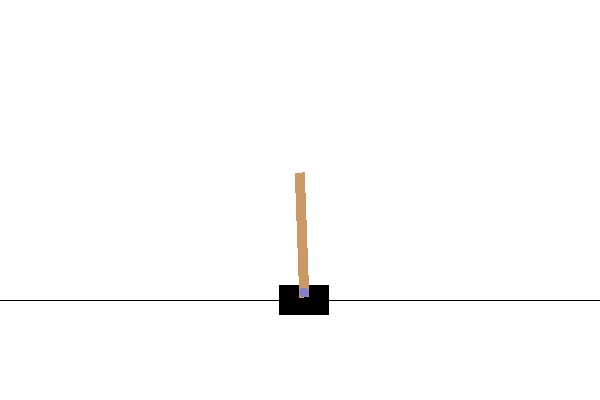

In [8]:
#@test {"skip": true}
env.reset()
PIL.Image.fromarray(env.render())

The `environment.step` method takes an `action` in the environment and returns a `TimeStep` tuple containing the next observation of the environment and the reward for the action.

The `time_step_spec()` method returns the specification for the `TimeStep` tuple. Its `observation` attribute shows the shape of observations, the data types, and the ranges of allowed values. The `reward` attribute shows the same details for the reward.


In [9]:
print('Observation Spec:')
print(env.time_step_spec().observation)

Observation Spec:
BoundedArraySpec(shape=(4,), dtype=dtype('float32'), name='observation', minimum=[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], maximum=[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38])


In [10]:
print('Reward Spec:')
print(env.time_step_spec().reward)

Reward Spec:
ArraySpec(shape=(), dtype=dtype('float32'), name='reward')


The `action_spec()` method returns the shape, data types, and allowed values of valid actions.

In [11]:
print('Action Spec:')
print(env.action_spec())

Action Spec:
BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=1)


In the Cartpole environment:

-   `observation` is an array of 4 floats: 
    -   the position and velocity of the cart
    -   the angular position and velocity of the pole 
-   `reward` is a scalar float value
-   `action` is a scalar integer with only two possible values:
    -   `0` — "move left"
    -   `1` — "move right"


In [12]:
time_step = env.reset()
print('Time step:')
print(time_step)

action = np.array(1, dtype=np.int32)

next_time_step = env.step(action)
print('Next time step:')
print(next_time_step)

Time step:
TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([-0.02109759, -0.00062286,  0.04167245, -0.03825747], dtype=float32),
 'reward': array(0., dtype=float32),
 'step_type': array(0, dtype=int32)})
Next time step:
TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([-0.02111005,  0.1938775 ,  0.0409073 , -0.31750655], dtype=float32),
 'reward': array(1., dtype=float32),
 'step_type': array(1, dtype=int32)})


Usually two environments are instantiated: one for training and one for evaluation. 

In [13]:
train_py_env = suite_gym.load(env_name)
eval_py_env = suite_gym.load(env_name)

The Cartpole environment, like most environments, is written in pure Python. This is converted to TensorFlow using the `TFPyEnvironment` wrapper.

The original environment's API uses Numpy arrays. The `TFPyEnvironment` converts these to `Tensors` to make it compatible with Tensorflow agents and policies.


In [14]:
train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

## Agent

The algorithm used to solve an RL problem is represented by an `Agent`. TF-Agents provides standard implementations of a variety of `Agents`, including:

-   [DQN](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf) (used in this tutorial)
-   [REINFORCE](https://www-anw.cs.umass.edu/~barto/courses/cs687/williams92simple.pdf)
-   [DDPG](https://arxiv.org/pdf/1509.02971.pdf)
-   [TD3](https://arxiv.org/pdf/1802.09477.pdf)
-   [PPO](https://arxiv.org/abs/1707.06347)
-   [SAC](https://arxiv.org/abs/1801.01290)

The DQN agent can be used in any environment which has a discrete action space.

At the heart of a DQN Agent is a `QNetwork`, a neural network model that can learn to predict `QValues` (expected returns) for all actions, given an observation from the environment.

We will use `tf_agents.networks.` to create a `QNetwork`. The network will consist of a sequence of `tf.keras.layers.Dense` layers, where the final layer will have 1 output for each possible action.

In [15]:
fc_layer_params = (100, 50)
action_tensor_spec = tensor_spec.from_spec(env.action_spec())
num_actions = action_tensor_spec.maximum - action_tensor_spec.minimum + 1

# Define a helper function to create Dense layers configured with the right
# activation and kernel initializer.
def dense_layer(num_units):
  return tf.keras.layers.Dense(
      num_units,
      activation=tf.keras.activations.relu,
      kernel_initializer=tf.keras.initializers.VarianceScaling(
          scale=2.0, mode='fan_in', distribution='truncated_normal'))

# QNetwork consists of a sequence of Dense layers followed by a dense layer
# with `num_actions` units to generate one q_value per available action as
# its output.
dense_layers = [dense_layer(num_units) for num_units in fc_layer_params]
q_values_layer = tf.keras.layers.Dense(
    num_actions,
    activation=None,
    kernel_initializer=tf.keras.initializers.RandomUniform(
        minval=-0.03, maxval=0.03),
    bias_initializer=tf.keras.initializers.Constant(-0.2))
q_net = sequential.Sequential(dense_layers + [q_values_layer])

Now use `tf_agents.agents.dqn.dqn_agent` to instantiate a `DqnAgent`. In addition to the `time_step_spec`, `action_spec` and the QNetwork, the agent constructor also requires an optimizer (in this case, `AdamOptimizer`), a loss function, and an integer step counter.

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

train_step_counter = tf.Variable(0)

agent = dqn_agent.DqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    train_step_counter=train_step_counter)

agent.initialize()

## Policies

A policy defines the way an agent acts in an environment. Typically, the goal of reinforcement learning is to train the underlying model until the policy produces the desired outcome.

In this tutorial:

-   The desired outcome is keeping the pole balanced upright over the cart.
-   The policy returns an action (left or right) for each `time_step` observation.

Agents contain two policies: 

-   `agent.policy` — The main policy that is used for evaluation and deployment.
-   `agent.collect_policy` — A second policy that is used for data collection.


In [17]:
eval_policy = agent.policy
collect_policy = agent.collect_policy

Policies can be created independently of agents. For example, use `tf_agents.policies.random_tf_policy` to create a policy which will randomly select an action for each `time_step`.

In [18]:
random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
                                                train_env.action_spec())

To get an action from a policy, call the `policy.action(time_step)` method. The `time_step` contains the observation from the environment. This method returns a `PolicyStep`, which is a named tuple with three components:

-   `action` — the action to be taken (in this case, `0` or `1`)
-   `state` — used for stateful (that is, RNN-based) policies
-   `info` — auxiliary data, such as log probabilities of actions

In [19]:
example_environment = tf_py_environment.TFPyEnvironment(
    suite_gym.load('CartPole-v0'))

In [20]:
time_step = example_environment.reset()

In [21]:
random_policy.action(time_step)

PolicyStep(action=<tf.Tensor: shape=(1,), dtype=int64, numpy=array([1])>, state=(), info=())

## Metrics and Evaluation

The most common metric used to evaluate a policy is the average return. The return is the sum of rewards obtained while running a policy in an environment for an episode. Several episodes are run, creating an average return.

The following function computes the average return of a policy, given the policy, environment, and a number of episodes.


In [22]:
#@test {"skip": true}
def compute_avg_return(environment, policy, num_episodes=10):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]


# See also the metrics module for standard implementations of different metrics.
# https://github.com/tensorflow/agents/tree/master/tf_agents/metrics

Running this computation on the `random_policy` shows a baseline performance in the environment.

In [23]:
compute_avg_return(eval_env, random_policy, num_eval_episodes)

20.7

## Replay Buffer

In order to keep track of the data collected from the environment, we will use [Reverb](https://deepmind.com/research/open-source/Reverb), an efficient, extensible, and easy-to-use replay system by Deepmind. It stores experience data when we collect trajectories and is consumed during training.

This replay buffer is constructed using specs describing the tensors that are to be stored, which can be obtained from the agent using agent.collect_data_spec.


In [24]:
table_name = 'uniform_table'
replay_buffer_signature = tensor_spec.from_spec(
      agent.collect_data_spec)
replay_buffer_signature = tensor_spec.add_outer_dim(
    replay_buffer_signature)

table = reverb.Table(
    table_name,
    max_size=replay_buffer_max_length,
    sampler=reverb.selectors.Uniform(),
    remover=reverb.selectors.Fifo(),
    rate_limiter=reverb.rate_limiters.MinSize(1),
    signature=replay_buffer_signature)

reverb_server = reverb.Server([table])

replay_buffer = reverb_replay_buffer.ReverbReplayBuffer(
    agent.collect_data_spec,
    table_name=table_name,
    sequence_length=2,
    local_server=reverb_server)

rb_observer = reverb_utils.ReverbAddTrajectoryObserver(
  replay_buffer.py_client,
  table_name,
  sequence_length=2)

[reverb/cc/platform/tfrecord_checkpointer.cc:150]  Initializing TFRecordCheckpointer in /tmp/tmpcz7e0i7c.
[reverb/cc/platform/tfrecord_checkpointer.cc:385] Loading latest checkpoint from /tmp/tmpcz7e0i7c
[reverb/cc/platform/default/server.cc:71] Started replay server on port 21909


For most agents, `collect_data_spec` is a named tuple called `Trajectory`, containing the specs for observations, actions, rewards, and other items.

In [25]:
agent.collect_data_spec

Trajectory(
{'action': BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0), maximum=array(1)),
 'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32)),
 'next_step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'observation': BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)),
 'policy_info': (),
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type')})

In [26]:
agent.collect_data_spec._fields

('step_type',
 'observation',
 'action',
 'policy_info',
 'next_step_type',
 'reward',
 'discount')

## Data Collection

Now execute the random policy in the environment for a few steps, recording the data in the replay buffer.

Here we are using 'PyDriver' to run the experience collecting loop. You can learn more about TF Agents driver in our [drivers tutorial](https://www.tensorflow.org/agents/tutorials/4_drivers_tutorial).

In [27]:
#@test {"skip": true}
py_driver.PyDriver(
    env,
    py_tf_eager_policy.PyTFEagerPolicy(
      random_policy, use_tf_function=True),
    [rb_observer],
    max_steps=initial_collect_steps).run(train_py_env.reset())

(TimeStep(
 {'discount': array(1., dtype=float32),
  'observation': array([ 0.04100575,  0.16847703, -0.12718087, -0.6300714 ], dtype=float32),
  'reward': array(1., dtype=float32),
  'step_type': array(1, dtype=int32)}),
 ())

The replay buffer is now a collection of Trajectories.

In [28]:
# For the curious:
# Uncomment to peel one of these off and inspect it.
# iter(replay_buffer.as_dataset()).next()

The agent needs access to the replay buffer. This is provided by creating an iterable `tf.data.Dataset` pipeline which will feed data to the agent.

Each row of the replay buffer only stores a single observation step. But since the DQN Agent needs both the current and next observation to compute the loss, the dataset pipeline will sample two adjacent rows for each item in the batch (`num_steps=2`).

This dataset is also optimized by running parallel calls and prefetching data.

In [29]:
# Dataset generates trajectories with shape [Bx2x...]
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3,
    sample_batch_size=batch_size,
    num_steps=2).prefetch(3)

dataset

<PrefetchDataset shapes: (Trajectory(
{action: (64, 2),
 discount: (64, 2),
 next_step_type: (64, 2),
 observation: (64, 2, 4),
 policy_info: (),
 reward: (64, 2),
 step_type: (64, 2)}), SampleInfo(key=(64, 2), probability=(64, 2), table_size=(64, 2), priority=(64, 2))), types: (Trajectory(
{action: tf.int64,
 discount: tf.float32,
 next_step_type: tf.int32,
 observation: tf.float32,
 policy_info: (),
 reward: tf.float32,
 step_type: tf.int32}), SampleInfo(key=tf.uint64, probability=tf.float64, table_size=tf.int64, priority=tf.float64))>

In [30]:
iterator = iter(dataset)
print(iterator)

In [31]:
# For the curious:
# Uncomment to see what the dataset iterator is feeding to the agent.
# Compare this representation of replay data 
# to the collection of individual trajectories shown earlier.

# iterator.next()

## Training the agent

Two things must happen during the training loop:

-   collect data from the environment
-   use that data to train the agent's neural network(s)

This example also periodicially evaluates the policy and prints the current score.

The following will take ~5 minutes to run.

In [32]:
#@test {"skip": true}
try:
  %%time
except:
  pass

# (Optional) Optimize by wrapping some of the code in a graph using TF function.
agent.train = common.function(agent.train)

# Reset the train step.
agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
returns = [avg_return]

# Reset the environment.
time_step = train_py_env.reset()

# Create a driver to collect experience.
collect_driver = py_driver.PyDriver(
    env,
    py_tf_eager_policy.PyTFEagerPolicy(
      agent.collect_policy, use_tf_function=True),
    [rb_observer],
    max_steps=collect_steps_per_iteration)

for _ in range(num_iterations):

  # Collect a few steps and save to the replay buffer.
  time_step, _ = collect_driver.run(time_step)

  # Sample a batch of data from the buffer and update the agent's network.
  experience, unused_info = next(iterator)
  train_loss = agent.train(experience).loss

  step = agent.train_step_counter.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, train_loss))

  if step % eval_interval == 0:
    avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
    print('step = {0}: Average Return = {1}'.format(step, avg_return))
    returns.append(avg_return)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


[reverb/cc/client.cc:163] Sampler and server are owned by the same process (15446) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:163] Sampler and server are owned by the same process (15446) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:163] Sampler and server are owned by the same process (15446) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:163] Sampler and server are owned by the same process (15446) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:163] Sampler and server are owned by the same process (15446) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:163] Sampler and server are owned by the same process (15446) so Table uniform_table is accessed directly without gRPC.


step = 200: loss = 27.080341339111328


step = 400: loss = 3.0314550399780273


step = 600: loss = 470.9187927246094


step = 800: loss = 548.7870483398438


step = 1000: loss = 4315.17578125


step = 1000: Average Return = 48.400001525878906


step = 1200: loss = 5297.24853515625


step = 1400: loss = 11601.296875


step = 1600: loss = 60482.578125


step = 1800: loss = 802764.8125


step = 2000: loss = 1689283.0


step = 2000: Average Return = 63.400001525878906


step = 2200: loss = 4928921.0


step = 2400: loss = 5508345.0


step = 2600: loss = 17888162.0


step = 2800: loss = 23993148.0


step = 3000: loss = 10192765.0


step = 3000: Average Return = 74.0999984741211


step = 3200: loss = 88318176.0


step = 3400: loss = 77485728.0


step = 3600: loss = 3236693504.0


step = 3800: loss = 102289840.0


step = 4000: loss = 168594496.0


step = 4000: Average Return = 73.5999984741211


step = 4200: loss = 348990528.0


step = 4400: loss = 101819664.0


step = 4600: loss = 136486208.0


step = 4800: loss = 133454864.0


step = 5000: loss = 592934784.0


step = 5000: Average Return = 71.5999984741211


step = 5200: loss = 216909120.0


step = 5400: loss = 181369648.0


step = 5600: loss = 600455680.0


step = 5800: loss = 551183744.0


step = 6000: loss = 368749824.0


step = 6000: Average Return = 83.5


step = 6200: loss = 1010418176.0


step = 6400: loss = 171257856.0


step = 6600: loss = 115424904.0


step = 6800: loss = 144941152.0


step = 7000: loss = 257932752.0


step = 7000: Average Return = 107.0


step = 7200: loss = 854109248.0


step = 7400: loss = 95970128.0


step = 7600: loss = 325583744.0


step = 7800: loss = 858134016.0


step = 8000: loss = 197960128.0


step = 8000: Average Return = 124.19999694824219


step = 8200: loss = 310187552.0


step = 8400: loss = 572293760.0


step = 8600: loss = 2338323456.0


step = 8800: loss = 384659392.0


step = 9000: loss = 676924544.0


step = 9000: Average Return = 200.0


step = 9200: loss = 946199168.0


step = 9400: loss = 605189504.0


step = 9600: loss = 768988928.0


step = 9800: loss = 508231776.0


step = 10000: loss = 526518016.0


step = 10000: Average Return = 200.0


step = 10200: loss = 1461528704.0


step = 10400: loss = 709822016.0


step = 10600: loss = 2770553344.0


step = 10800: loss = 496421504.0


step = 11000: loss = 1822116864.0


step = 11000: Average Return = 200.0


step = 11200: loss = 744854208.0


step = 11400: loss = 778800384.0


step = 11600: loss = 667049216.0


step = 11800: loss = 586587648.0


step = 12000: loss = 2586833920.0


step = 12000: Average Return = 200.0


step = 12200: loss = 1002041472.0


step = 12400: loss = 1526919552.0


step = 12600: loss = 1670877056.0


step = 12800: loss = 1857608704.0


step = 13000: loss = 1040727936.0


step = 13000: Average Return = 200.0


step = 13200: loss = 1807798656.0


step = 13400: loss = 1457996544.0


step = 13600: loss = 1322671616.0


step = 13800: loss = 22940983296.0


step = 14000: loss = 1556422912.0


step = 14000: Average Return = 200.0


step = 14200: loss = 2488473600.0


step = 14400: loss = 46558289920.0


step = 14600: loss = 1958968960.0


step = 14800: loss = 4677744640.0


step = 15000: loss = 1648418304.0


step = 15000: Average Return = 200.0


step = 15200: loss = 46132723712.0


step = 15400: loss = 2189093888.0


step = 15600: loss = 1204941056.0


step = 15800: loss = 1578462080.0


step = 16000: loss = 1695949312.0


step = 16000: Average Return = 200.0


step = 16200: loss = 19554553856.0


step = 16400: loss = 2857277184.0


step = 16600: loss = 5782225408.0


step = 16800: loss = 2294467072.0


step = 17000: loss = 2397877248.0


step = 17000: Average Return = 200.0


step = 17200: loss = 2910329088.0


step = 17400: loss = 6317301760.0


step = 17600: loss = 2733602048.0


step = 17800: loss = 32502740992.0


step = 18000: loss = 6295858688.0


step = 18000: Average Return = 200.0


step = 18200: loss = 2564860160.0


step = 18400: loss = 76450430976.0


step = 18600: loss = 6347636736.0


step = 18800: loss = 6258629632.0


step = 19000: loss = 8091572224.0


step = 19000: Average Return = 200.0


step = 19200: loss = 3860335616.0


step = 19400: loss = 3552561152.0


step = 19600: loss = 4175943424.0


step = 19800: loss = 5975838720.0


step = 20000: loss = 4709884928.0


step = 20000: Average Return = 200.0


## Visualization


### Plots

Use `matplotlib.pyplot` to chart how the policy improved during training.

One iteration of `Cartpole-v0` consists of 200 time steps. The environment gives a reward of `+1` for each step the pole stays up, so the maximum return for one episode is 200. The charts shows the return increasing towards that maximum each time it is evaluated during training. (It may be a little unstable and not increase monotonically each time.)

(40.82000160217285, 250.0)

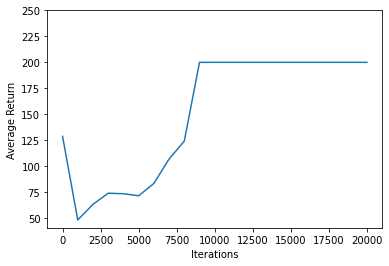

In [33]:
#@test {"skip": true}

iterations = range(0, num_iterations + 1, eval_interval)
plt.plot(iterations, returns)
plt.ylabel('Average Return')
plt.xlabel('Iterations')
plt.ylim(top=250)

### Videos

Charts are nice. But more exciting is seeing an agent actually performing a task in an environment. 

First, create a function to embed videos in the notebook.

In [34]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

Now iterate through a few episodes of the Cartpole game with the agent. The underlying Python environment (the one "inside" the TensorFlow environment wrapper) provides a `render()` method, which outputs an image of the environment state. These can be collected into a video.

In [35]:
def create_policy_eval_video(policy, filename, num_episodes=5, fps=30):
  filename = filename + ".mp4"
  with imageio.get_writer(filename, fps=fps) as video:
    for _ in range(num_episodes):
      time_step = eval_env.reset()
      video.append_data(eval_py_env.render())
      while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
        video.append_data(eval_py_env.render())
  return embed_mp4(filename)

create_policy_eval_video(agent.policy, "trained-agent")

[swscaler @ 0x55d99fdf83c0] Warning: data is not aligned! This can lead to a speed loss


For fun, compare the trained agent (above) to an agent moving randomly. (It does not do as well.)

In [36]:
create_policy_eval_video(random_policy, "random-agent")

[swscaler @ 0x55ffa7fe73c0] Warning: data is not aligned! This can lead to a speed loss
